### Objective 

- One-hot encoding and multiple regression

### ----------------------------------------------------------------------------------------------------

### Content

#### 1. Data Preprocessing
    - Data cleaning
    
#### 2. Exploratory data analysis (EDA)
    - Gain  understanding of the data set/s by summarizing their main characteristics
    using plots to visualise them.
    
#### 3. Feature engineering 
    - constructing relevant features from existing data to train a machine learning
    model.
    
#### 4. Model development

#### 5. Predictions

#### 6. Insights

### --------------------------------------------------------------------------------------------

### 1. Data preprocessing

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import plotly.graph_objects as go


pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [15]:
df = pd.read_csv('/home/recruit/Umuzi/Multilinear/salary.csv')
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [50]:
metaData = pd.read_csv('/home/recruit/Umuzi/Multilinear/Salary metadata.csv' , sep = ':')
metaData

,Variable;Type;Explanation
0,salary;Continuous;Annual salary in dollars
1,exprior;Continuous;Years of experience prior to working in this field
2,yearsworked;Continuous;Years worked in this field
3,yearsrank;Continuous;Years worked at current rank
4,"market;Continuous;Market value (1 = salary at market value for position, <1 salary lower than market value for position, >1 salary higher than market value for position)"
5,"degree;Binary;Has degree (0 = no, 1 = yes)"
6,"otherqual;Binary;Has other post-secondary qualification (0 = no, 1 = yes)"
7,"position;Categorical;Position (1 = Junior Employee, 2 = Manager, 3 = Executive)"
8,"male;Binary;0 = no, 1 = yes"
9,"Field;Categorical;Field of work (1 = Engineering, 2 = Finance, 3 = Human Resources, 4 = Marketing)"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [18]:
df

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
509,45906.0,6,17,11,0.92,1,0,2,0,2,70
510,60402.0,6,19,7,0.86,1,0,3,0,1,72
511,53187.0,19,7,6,0.78,1,0,3,0,4,76
512,56542.0,8,20,10,0.78,1,0,3,0,2,78


#### Cleaning dataset

- Checking for null/ missing values
- Checking for duplicates


In [19]:
#Checking for null/ missing values

null_values = df[df.salary.isnull()]
null_values

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [20]:
#Dealing with missing and/or null values

df = df.dropna()
df.isnull().sum().sum()

0

In [21]:
#Checking for duplicates

df.duplicated().any() 

False

### Checking for extreme values

In [118]:
# detecting extreme values using IQR
q3, q1 = np.percentile(df, [75 ,25])
IQR = q3 - q1
print('Our interquatile range is :',iqr)

Our interquatile range is : 3.1349999905


In [119]:
# removing outliers from the dataset
new_df = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]

### 2. Exploratory data analysis

#### descriptive statistics table

In [109]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


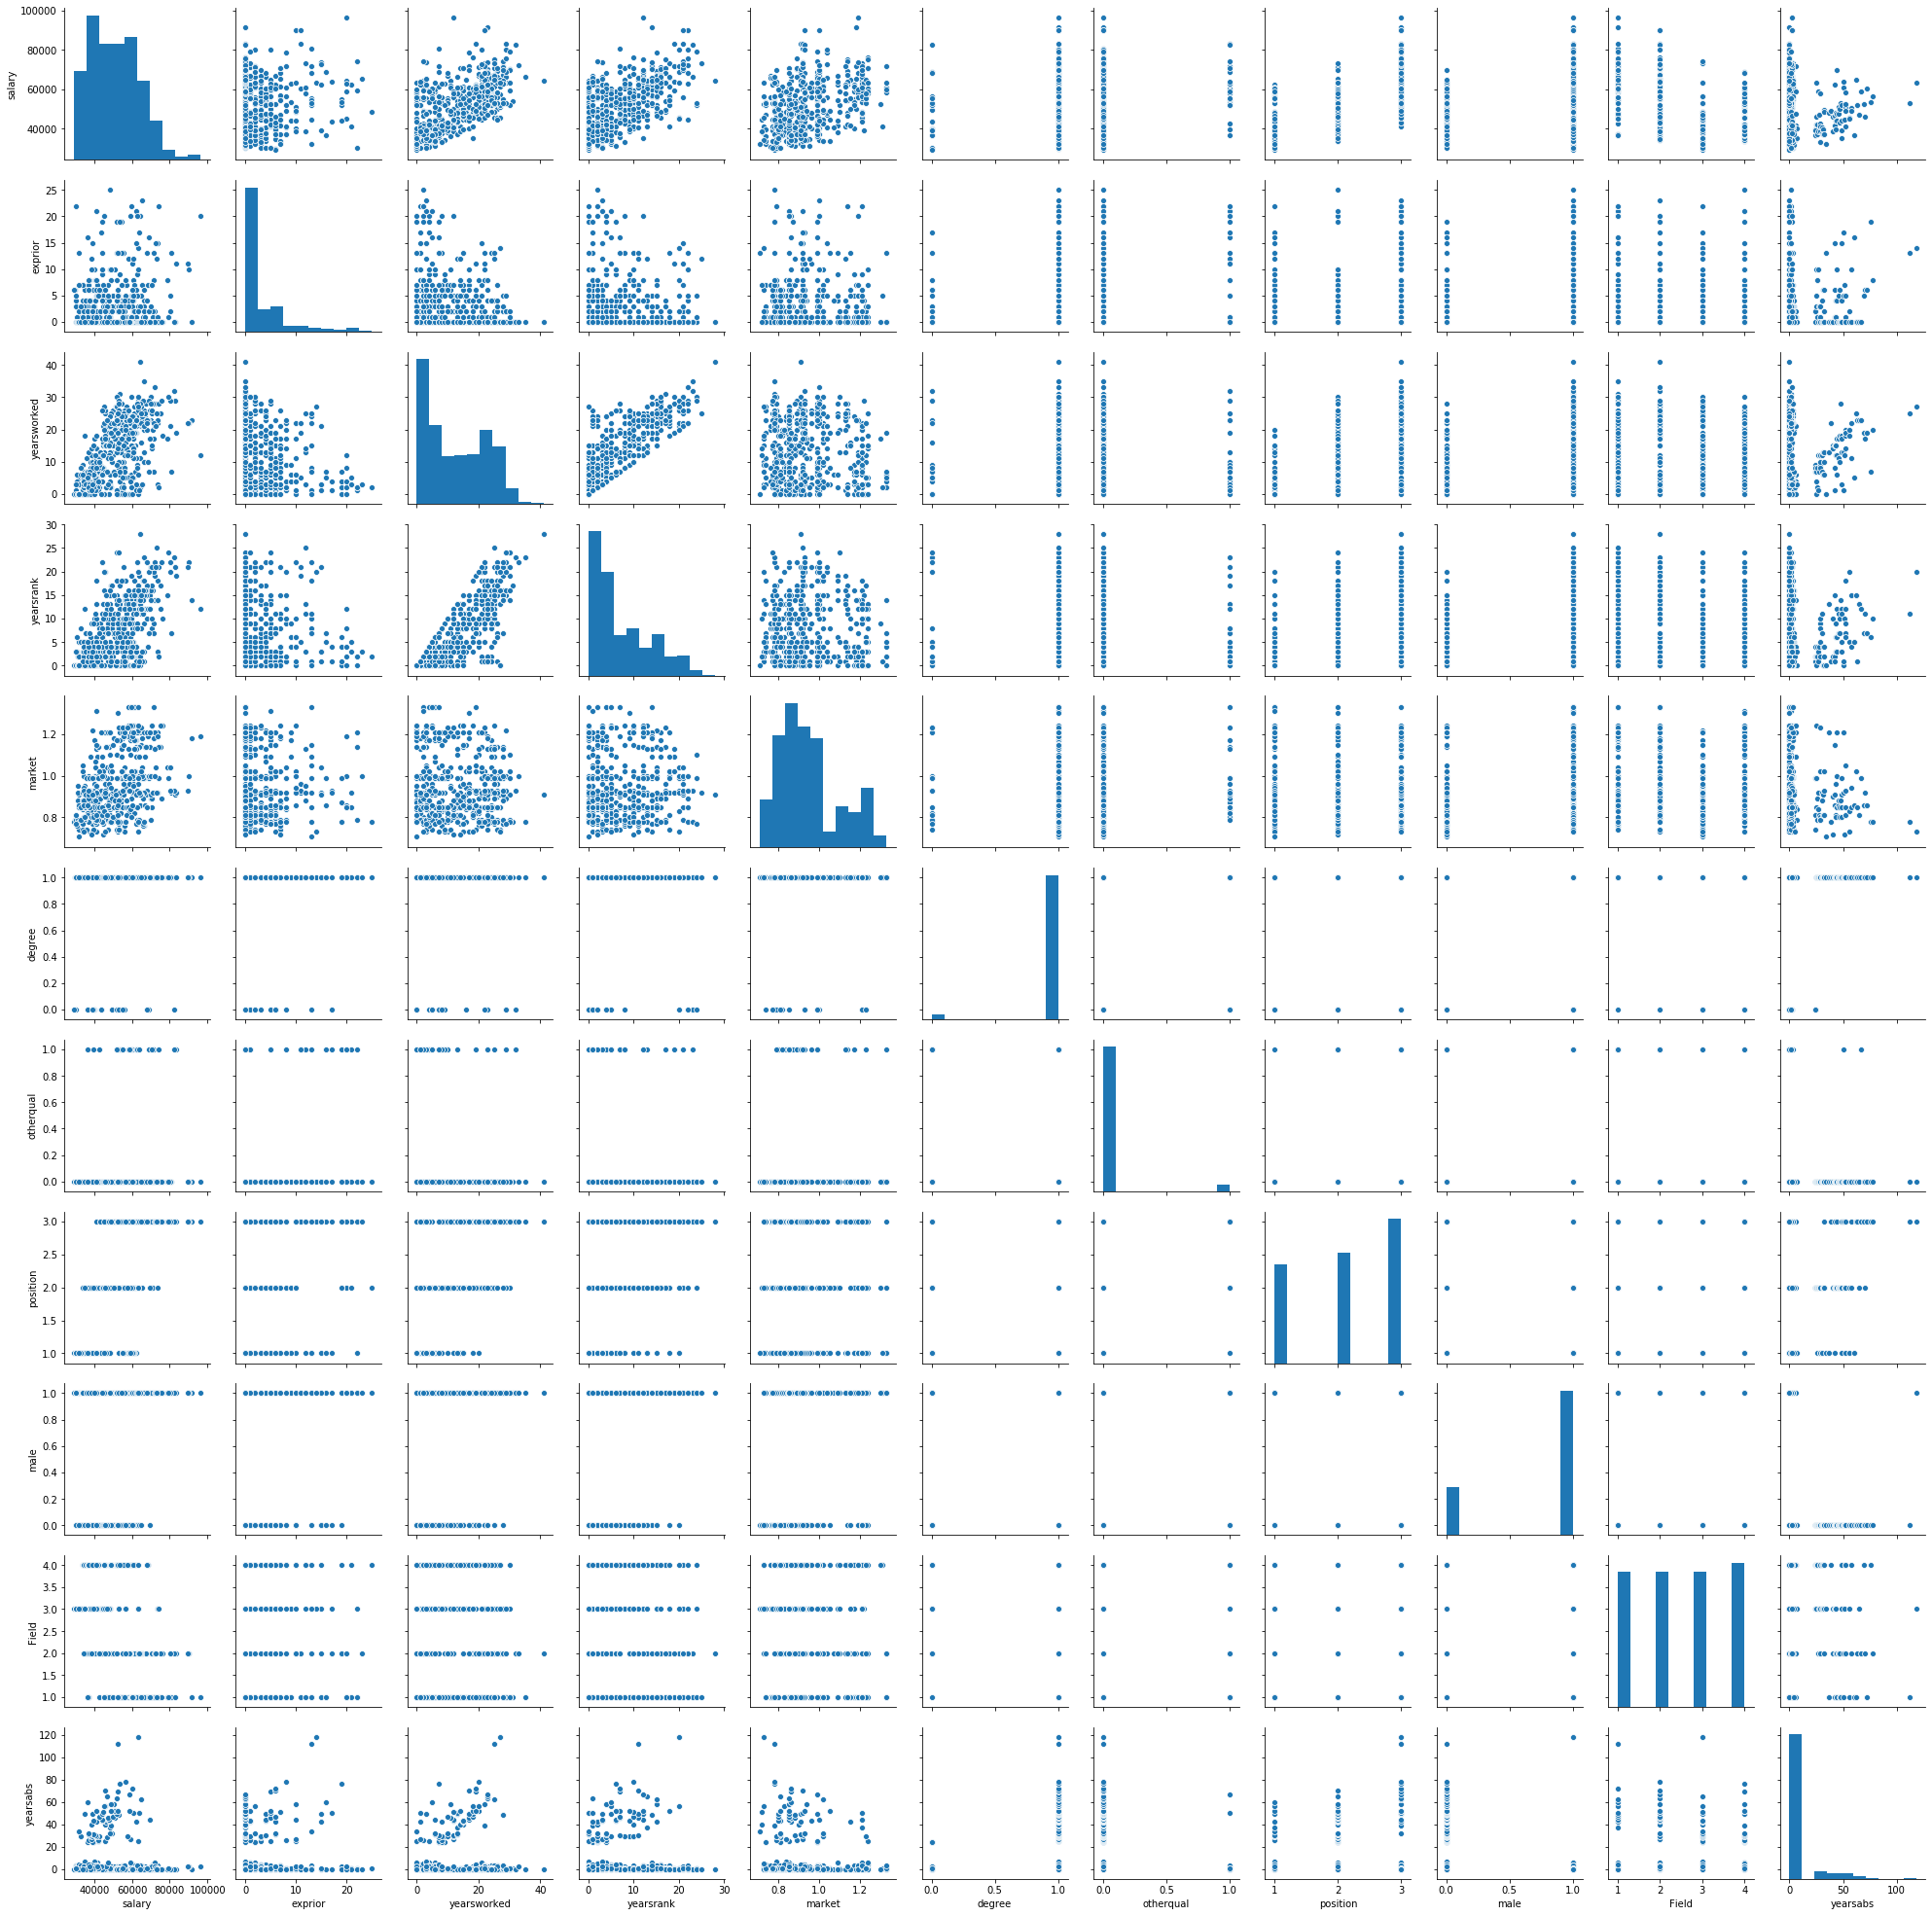

In [135]:
sns.pairplot(df)

### 3. Feature engineering 

In [56]:
corr = df.corr()
corr.head(1)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.0,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.06963


Features with a strong correlation to salary are as follows:

- Years Worked
- Years rank
- Position

### Validating the effect of the correlation of the above features

- significance test using p-value

In [53]:
print(f'p-values of years-worked and salary: {stats.pearsonr(df.yearsworked, df.salary)}')
print(f'p-values of years-rank and salary: {stats.pearsonr(df.yearsrank, df.salary)}')
print(f'p-values of postion and salary: {stats.pearsonr(df.position, df.salary)}')

p-values of years-worked and salary: (0.6235888657598048, 1.2873351342916404e-56)
p-values of years-rank and salary: (0.6107063176375227, 9.307173080331551e-54)
p-values of postion and salary: (0.7021217379212221, 2.164001495311446e-77)


In [62]:
print(f'p-values of market and salary: {stats.pearsonr(df.market, df.salary)}')
print(f'p-values of exprior and salary: {stats.pearsonr(df.exprior, df.salary)}')
print(f'p-values of otherqual and salary: {stats.pearsonr(df.otherqual, df.salary)}')
print(f'p-values of degree and salary: {stats.pearsonr(df.degree, df.salary)}')
print(f'p-values of male  and salary: {stats.pearsonr(df.male, df.salary)}')

p-values of market and salary: (0.40721372136457823, 6.53139960096251e-22)
p-values of exprior and salary: (0.11998926207751981, 0.006510361905813404)
p-values of otherqual and salary: (0.16713659649226642, 0.0001428907816048765)
p-values of degree and salary: (0.044553738421277224, 0.3138585657300952)
p-values of male  and salary: (0.36156427126722845, 2.7419541353988917e-17)


###### since there are aother features with moderate to weak corr with the tartget, will check their effect so to see if it is neccessary to include them 

as follows:

- market
- male ?????
- exprior
- otherqual
- degree

-only degree has not proven its signifcance therefore will not be included for the pupose of this study

#### validating the negative corr

In [63]:
print(f'p-values of Field and salary: {stats.pearsonr(df.Field, df.salary)}')
print(f'p-values of yearsabs and salary: {stats.pearsonr(df.yearsabs, df.salary)}')

p-values of Field and salary: (-0.49931605356779035, 1.0613435184659217e-33)
p-values of yearsabs and salary: (-0.06963030449260929, 0.11522022410400505)


##### - only include field

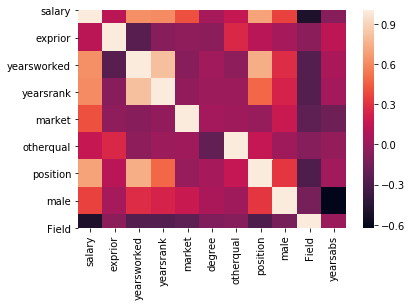

In [104]:
sns.heatmap(drop)

#### Checking for  Multicolineaarity

In [107]:
colinear_cheeck = corr

drop = colinear_cheeck.drop(['yearsabs','degree'])
drop.style.background_gradient(cmap='coolwarm')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1,0.119989,0.623589,0.610706,0.407214,0.0445537,0.167137,0.702122,0.361564,-0.499316,-0.0696303
exprior,0.119989,1,-0.245788,-0.0658925,-0.0352024,-0.0491653,0.264655,0.118031,0.0472764,-0.0468544,0.132022
yearsworked,0.623589,-0.245788,1,0.813456,-0.07074,0.0281218,-0.0401567,0.746311,0.278286,-0.264208,0.0561133
yearsrank,0.610706,-0.0658925,0.813456,1,-0.0268693,0.00634657,0.00723207,0.484891,0.237397,-0.26562,0.0359616
market,0.407214,-0.0352024,-0.07074,-0.0268693,1,0.0364559,0.0216407,-0.0131161,0.181401,-0.223887,-0.167177
otherqual,0.167137,0.264655,-0.0401567,0.00723207,0.0216407,-0.214654,1,0.160941,0.0160821,-0.0762022,-0.0177916
position,0.702122,0.118031,0.746311,0.484891,-0.0131161,0.0433353,0.160941,1,0.31739,-0.292313,0.0305213
male,0.361564,0.0472764,0.278286,0.237397,0.181401,0.0614192,0.0160821,0.31739,1,-0.130599,-0.622058
Field,-0.499316,-0.0468544,-0.264208,-0.26562,-0.223887,-0.0990774,-0.0762022,-0.292313,-0.130599,1,0.000778011


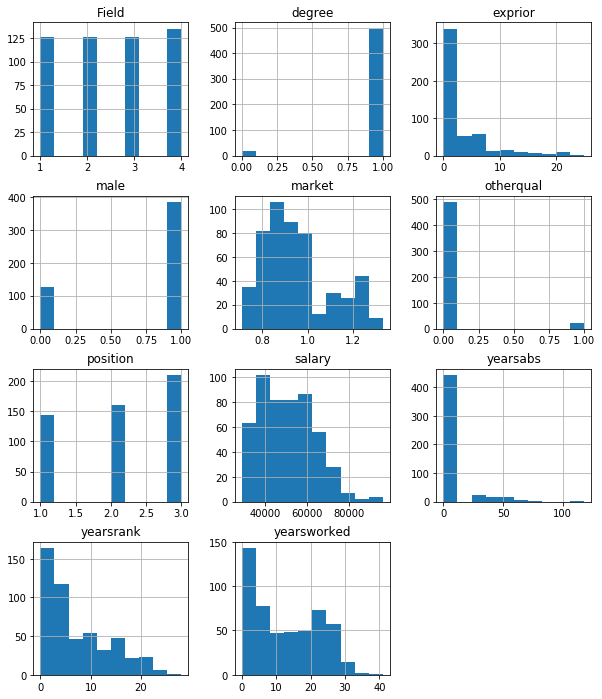

In [134]:
df.hist(bins=10, figsize=(10,12))
plt.show()

#### Variance Inflation Factor (VIF)

### 4. Model development

#### Splitting the data set to Training and Testing

In [22]:
train, test = train_test_split(df, test_size=0.2)

In [23]:
len(train)

410

In [24]:
len(test)

103

### 5. Predictions

## 6. Insights

